Based on a post @ [Towards Data Science](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638).

## Detecting stationarity in time series data

"The ability to determine wether a time series is stationary is important".
- "Rather than deciding between two strict options, this usually means being able to ascertain, with high probability, that a series is generated by a stationary process".

### Visualizations

"The most basic methods for stationarity detection rely on plotting the data, or functions of it, and determining visually whether they present some known property of stationary (or non-stationary) data".

#### Looking at the data

"Trying to determine whether a time series was generated by a stationary process just by looking at its plot is a dubious venture".
- "However, there are some basic properties of non-stationary data that we can look for".
- "Let’s take as example the following nice plots from [Hyndman & Athanasopoulos, 2018](https://otexts.com/fpp2/stationarity.html)":


In [1]:
from IPython.display import Image

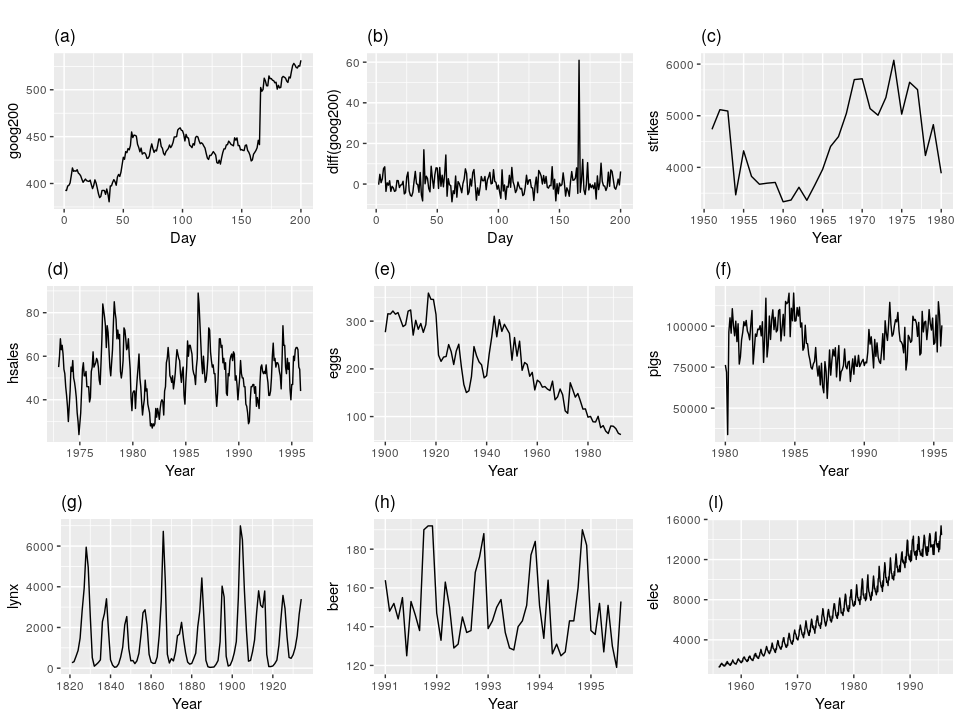

In [2]:
Image('./IMG/hyndman-athanasopoulos.png')

**(a)** Google stock price for 200 consecutive days;

**(b)** Daily change in the Google stock price for 200 consecutive days;

**(c)** Annual number of strikes in the US;

**(d)** Monthly sales of new one-family houses sold in the US;

**(e)** Annual price of a dozen eggs in the US (constant dollars);

**(f)** Monthly total of pigs slaughtered in Victoria, Australia;

**(g)** Annual total of lynx trapped in the McKenzie River district of north-west Canada;

**(h)** Monthly Australian beer production;

**(i)** Monthly Australian electricity production.


"Hyndman & Athanasopoulos give several heuristics used to rule out stationarity in the above plots, corresponding to the basic characteristic of stationary processes":

- "Prominent seasonality can be observed in series **(d)**, **(h)** and **(i)** ".
- "Noticeable trends and changing levels can be seen in series **(a)**, **(c)**, **(e)**, **(f)** and **(i)**".
- "Series **(i)** shows increasing variance".

"The authors also add that although the strong cycles in series **(g)** might appear to make it non-stationary, the timing of these cycles makes them unpredictable (due to the underlying dynamic dominating lynx population, driven partially by available feed)".
- "This leaves series **(b)** and **(g)** as the only stationary series".

"This is not a very dependable method to detect stationarity, and it is usually used to get an initial impression of the data rather than to make definite assertions".


#### Looking at Autocorrelation Function (ACF) plots

"[Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation) is the correlation of a signal with a delayed copy — or a lag — of itself as a function of the delay".

- "When plotting the value of the ACF for increasing lags (a plot called a [correlogram](https://en.wikipedia.org/wiki/Correlogram)), the values tend to degrade to zero quickly for <u>stationary</u> time series (see figure below, <u>right</u>), while for <u>non-stationary</u> data the degradation will happen more slowly (see figure below, <u>left</u>)".


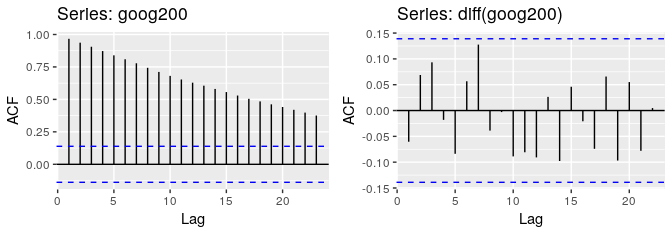

In [3]:
Image('./IMG/acf-plot.png')

"Alternatively, [Nielsen, 2006](https://www.jstor.org/stable/3879300?seq=1) suggests that plotting correlograms based on both autocorrelations and scaled autocovariances, and comparing them, provides a better way of discriminating between stationary and non-stationary data".

***

### Parametric tests

"Another, more rigorous approach, *(sic)* to detecting stationarity in time series data is using statistical tests developed to detect **specific** types of stationarity, namely those brought about by simple parametric models of the generating stochastic process".

#### Unit root tests

"The [Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) test was the first statistical test developed to test <u>the null hypothesis that a unit root is present in an autoregressive model of a given time series, and that the process is thus not stationary</u>".
- "The original test treats the case of a simple lag-1 AR model".
- "The test has three versions, that differ in the model of unit root process they test for":
    1. "Test for a unit root": $\Delta y_i = \delta y_{t-1} + u_t$.
    2. "Test for a unit root with drift": $\Delta y_t = a_0 + \delta y_{t-1} + u_t$.
    3. "Test for a unit root with drift and deterministic time trend": $\Delta y_t = a_0 + a_1 t \delta y_{t-1} + u_t$.
- "The choice of which version to use — which can significantly effect the size and power of the test — can use prior knowledge or structured strategies for series of ordered tests, allowing the discovery of the most fitting version".

"Extensions of the test were developed to accommodate more complex models and data":
- "These include the [Augmented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) (ADF) (using AR of any order $p$ and supporting modeling of time trends)";
- "the [Phillips-Perron](https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test) test (PP) (adding robustness to unspecified autocorrelation and heteroscedasticity)";
- "and the [ADF-GLS](https://en.wikipedia.org/wiki/ADF-GLS_test) test (locally de-trending data to deal with constant and linear trends)".

"Python implementations can be found in the [`statsmodels`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html#statsmodels.tsa.stattools.adfuller) and [ARCH](https://github.com/bashtage/arch) packages".

#### The [KPSS test](https://en.wikipedia.org/wiki/KPSS_test)

"Conversely to the Dickey-Fuller family of tests, the null hypothesis assumes stationarity around a mean or a linear trend, while the alternative is the presence of a unit root" ([Kwiatkowski et al, 1992](http://debis.deu.edu.tr/userweb//onder.hanedar/dosyalar/kpss.pdf)).

- "The test is based on linear regression, breaking up the series into three parts":
    - "a [deterministic](https://www.statisticshowto.datasciencecentral.com/deterministic/) trend ($\beta t$)";
    - "a [random walk](https://www.statisticshowto.datasciencecentral.com/random-walk/) ($rt$)";
    - "and a stationary error ($\varepsilon t$)";
    "with the regression equation":
    $$
    x_t = r_t +\beta t + \varepsilon_t, \quad r_t = r_{t-1} + u_t
    $$
    "where $\mathbf u \sim (0, \sigma^2)$ and are iid".
    - "The null hypothesis is thus stated to be $H_0 : \sigma^2 = 0$, while the alternative is $H_a : \sigma^2 > 0$".
    - "Whether the stationarity in the null hypothesis is around a mean or a trend is determined by setting $\beta = 0$ (in which case $x$ is stationary around the mean $r_0$) or $\beta \neq 0$, respectively".

"The KPSS test is often used to complement Dickey-Fuller-type tests".

"Python implementations can be found in the [`statsmodels`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html#statsmodels.tsa.stattools.kpss) and ARCH packages".

#### The Zivot and Andrews Test

"The aforementioned tests do not allow for the possibility of a [structural break](https://en.wikipedia.org/wiki/Structural_break) — an abrupt change involving a change in the mean or other parameters of the process".
- "Assuming the time of the break as an exogenous phenomenon, [Perron](https://en.wikipedia.org/wiki/Pierre_Perron) showed that the power to reject a unit root decreases when the stationary alternative is true and a structural break is ignored".

"[Zivot and Andrews, 1992](https://www.jstor.org/stable/1391541?seq=1) propose a unit root test in which they assume that the exact time of the break-point is unknown".
- "Following Perron’s characterization of the form of structural break, Zivot and Andrews proceed with three models to test for a unit root":
    - **Model A**: "Permits a one-time change in the level of the series".
    - **Model B**: "Allows for a one-time change in the slope of the trend function".
    - **Model C**: "Combines one-time changes in the level and the slope of the trend function of the series".
- "Hence, to test for a unit root against the alternative of a one-time structural break, Zivot and Andrews use the following regression equations corresponding to the above three models" ([Waheed, 2006](https://mpra.ub.uni-muenchen.de/1797/1/MPRA_paper_1797.pdf)):
$$
\begin{align}
(\text A) & \quad\Delta y_t = c + \alpha y_{t-1} + \beta t + \gamma DU_t + \displaystyle\sum_{j=1}^{k} d_j \Delta y_{t-j} + \varepsilon_t \\
(\text B) & \quad\Delta y_t = c + \alpha y_{t-1} + \beta t + \theta DT_t + \displaystyle\sum_{j=1}^{k} d_j \Delta y_{t-j} + \varepsilon_t \\
(\text C) & \quad\Delta y_t = c + \alpha y_{t-1} + \beta t + \theta DU_t + \gamma DT_t + \displaystyle\sum_{j=1}^{k} d_j \Delta y_{t-j} + \varepsilon_t
\end{align}
$$

"A Python implementation can be found in the [ARCH](http://bashtage.github.io/arch/doc/unitroot/tests.html#arch.unitroot.ZivotAndrews) package and [here](https://github.com/JimVaranelli/ZAUnitRoot)".

#### Semi-parametric unit root tests

**Variance Ratio Test**: "[Breitung, 2002](https://www.sciencedirect.com/science/article/abs/pii/S0304407601001397) suggested a non-parametric test for the presence of a unit root based on a variance ratio statistic".
- "The null hypothesis is a process I(1) (integrated of order one) while the alternative is I(0)".
- "I list this test as semi-parametric because it tests for a specific, model-based, notion of stationarity".

***

### Non-parametric tests

"In the wake of the limitations of parametric tests, and the recognition they cover only a narrow sub-class of possible cases encountered in real data, a class of non-parametric tests for stationarity has emerged in time series analysis literature".
- "Naturally, these tests open up a promising avenue for investigating time series data: *you no longer have to assume very simple parametric models happen to apply to your data to find out whether it is stationary or not, or risk not discovering a complex form of the phenomenon not captured by these models*".
- "The reality of it, however, is more complex; there aren’t, at the moment, any widely-applicable non-parametric tests that encompass all real-life scenarios generating time series data".
    - "Instead, these tests limit themselves to specific types of data or processes".
    - "Also, I was not able to find implementations for any of the following tests".

#### A Nonparametric Test for Stationarity in Continuous-Time Markov Processes

"[Kanaya, 2011](https://pdfs.semanticscholar.org/8293/c4c6a2aaead2c9f0ac3b4aff6f94b71e5768.pdf) suggest this nonparametric test stationarity for *univariate [time-homogeneous Markov processes](https://en.wikipedia.org/wiki/Markov_chain#Time-homogeneous_Markov_chain_with_a_finite_state_space)* only, construct a kernel-based test statistic and conduct Monte-Carlo simulations to study the finite-sample size and power properties of the test".

#### A nonparametric test for stationarity in functional time series

"[Delft et al, 2017](https://arxiv.org/abs/1708.05248) suggest a nonparametric stationarity test limited to functional time series — data obtained by separating a *continuous* (in nature) time record into natural consecutive intervals, for example, days".
- "Note that [Delft and Eichler, 2018](https://arxiv.org/abs/1602.05125) have proposed a test for local stationarity for functional time series".
- "Also, [Vogt & Dette, 2015](https://projecteuclid.org/euclid.aos/1425398506) suggest a nonparametric method to estimate a smooth change point in a locally stationary framework".

#### A nonparametric test for stationarity based on local Fourier analysis

"[Basu et al, 2009](https://ieeexplore.ieee.org/document/4960256) suggest what may be the most applicable nonparametric test for stationarity present here, as it is applicable to any zero-mean discrete-time random process (and I assume here any finite sample of a discrete process you may have can easily be transformed to have zero mean)".